### logistic regression example 

https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

In [21]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [22]:
import scipy
from scipy.stats import spearmanr

In [23]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [24]:
import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [25]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Logistic regression on mtcars

In [27]:
address = 'C:\\Users\\Rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\TRAINING CONTENT\\mtcars.csv'
cars = pd.read_csv(address)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [28]:
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [29]:
cars_data = cars.iloc[:,[5,11]]
cars_data

,drat,carb
0,3.90,4
1,3.90,4
2,3.85,1
3,3.08,1
4,3.15,2
5,2.76,1
6,3.21,4
7,3.69,2
8,3.92,2
9,3.92,4


In [30]:
#cars_data_names = ['drat','carb']

Y = cars.iloc[:,9]

#### Checking for independence between features

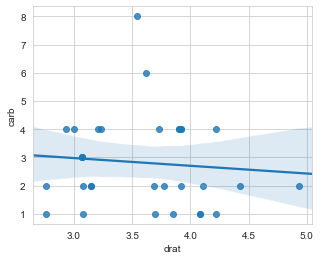

In [31]:
sb.regplot(x='drat', y='carb', data=cars, scatter=True)

In [33]:
drat = cars['drat']
carb = cars['carb']

spearmanr_coefficient, p_value =  spearmanr(drat, carb)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
print('P-Value is :',p_value)

Spearman Rank Correlation Coefficient -0.125
P-Value is : 0.49468240297065824


#### Checking for missing values

In [34]:
cars.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

#### Checking that your target is binary or ordinal

In [ ]:
sb.countplot(x='am', data=cars, palette='hls')

#### Checking that your dataset size is sufficient

In [ ]:
cars.info()

#### Deploying and evaluating your model

In [37]:
X = scale(cars_data)
print(X)

[[ 0.57659448  0.74696708]
 [ 0.57659448  0.74696708]
 [ 0.48158406 -1.14010764]
 [-0.98157639 -1.14010764]
 [-0.84856181 -0.51108274]
 [-1.58964307 -1.14010764]
 [-0.7345493   0.74696708]
 [ 0.17755072 -0.51108274]
 [ 0.61459865 -0.51108274]
 [ 0.61459865  0.74696708]
 [ 0.61459865  0.74696708]
 [-1.00057848  0.11794217]
 [-1.00057848  0.11794217]
 [-1.00057848  0.11794217]
 [-1.26660765  0.74696708]
 [-1.13359306  0.74696708]
 [-0.69654514  0.74696708]
 [ 0.91863199 -1.14010764]
 [ 2.53380911 -0.51108274]
 [ 1.18466116 -1.14010764]
 [ 0.1965528  -1.14010764]
 [-1.58964307 -0.51108274]
 [-0.84856181 -0.51108274]
 [ 0.25355906  0.74696708]
 [-0.98157639 -0.51108274]
 [ 0.91863199 -1.14010764]
 [ 1.58370492 -0.51108274]
 [ 0.32956739 -0.51108274]
 [ 1.18466116  0.74696708]
 [ 0.04453613  2.00501689]
 [-0.10748054  3.26306671]
 [ 0.97563824 -0.51108274]]


In [38]:
LogReg = LogisticRegression()



In [39]:
LogReg.fit(X,Y)


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print(LogReg.score(X,Y))

0.8125


In [41]:
y_pred = LogReg.predict(X)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



In [43]:
print(list(y_pred))
print(list(Y))

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
